# <a class="anchor" id="title">Avaliando Classificadores - Metricas de avaliação de modelo</a>
<img src="img/fitaMetric.jpg" alt="drawing" style="width:600px; height:200px">

## <a class="anchor" id="table">Table of Contents</a>

I. [Matrix de Confusão](#ConfusionMatrix)<br>
II. [Acuracidade](#accuracy)<br>
III. [Precisão](#precision)<br>
IV. [Recall](#recall)<br>
A. [Referências](#refs)<br>


In [1]:
import numpy as np
import random


%matplotlib inline

from util import matrix_confusao
from plot_chart import plot_confusion_matrix

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score


Dado y:

In [2]:
p = random.uniform(0.6, 0.8)
y = [np.random.choice([0, 1], p=[1-p, p]) for i in range(100)]
print(y)

[1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]


### Naive Predictor Performace

In [3]:
def random_predictors(n_predictors, n_predictions):
    predictions = []
    for n in range(n_predictors):
        p = random.uniform(0.6, 0.8)
        pred = [np.random.choice([0, 1], p=[1-p, p]) for i in range(n_predictions)]
        predictions.append((p, pred))
    return predictions, pred

In [4]:
preds_list, preds = random_predictors(1, 100)
print(preds_list [0:2])

[(0.6664062314393243, [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1])]


## <a class="anchor" id="ConfusionMatrix"> Matriz de confusão</a>

In [66]:
from util import matrix_confusao

In [67]:
conf_mtx = matrix_confusao(y, preds)
conf_mtx

array([[47, 27],
       [15, 11]], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, preds)

array([[11, 27],
       [15, 47]], dtype=int64)

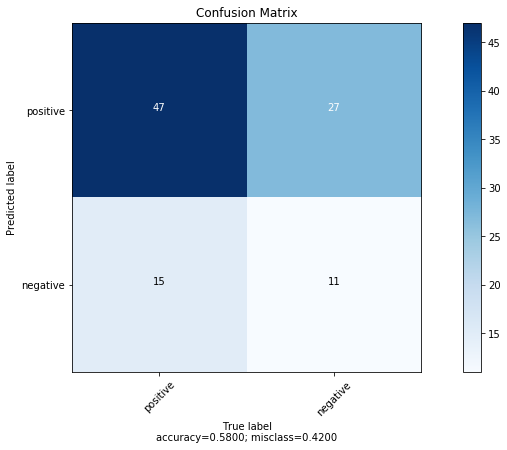

In [6]:
plot_confusion_matrix(cm           = conf_mtx, 
                      normalize    = False,
                      target_names = ['positive', 'negative'],
                      title        = "Confusion Matrix")

As colunas, predicted label, fazem referencias as predições enquanto as linhas, true label, fazem referencias aos valores corretos.

Dado que 1 é positivo e 0 é negativo.

|Valor        |Linha + coluna|Observação|
|-------------|--------------|----------|
|True Positive (TP)|positive + positive |O valor correto é positivo e o modelo preditou corretamente como positivo|  
|False positive (FP)|Negativo + Positive|O valor correto é negativo porém o modelo predicou erradamente como positivo |
|False Negative (FN)|Positive + negative|O valor correto é positivo porém o modelo predicou erradamente como negativo | 
|True Negative (TN)|negative + negative |O valor correto é negativo e o modelo predicou corretamente como negtivo|  

In [23]:
# Baseado nos resultados apresentados temos:
amostra = len(y)
TP = conf_mtx[0, 0] 
FP = conf_mtx[0, 1]
FN = conf_mtx[1, 0]
TN = conf_mtx[1, 1]

## <a class="anchor" id="accuracy">Acuracidade</a>

Quantas classificações foram feitas corretamente pelo modelo?

$$Accuracy (acc) = \frac{ True Positive + True Negative }{amostra}$$

In [37]:
acc = (TP+TN)/amostra
print(f"O modelo classificou {acc} de forma correta")

O modelo classificou 0.58 de forma correta


In [40]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
acc = accuracy_score(y, preds, normalize=False)
print(f"O modelo classificou {acc}% de forma correta")

O modelo classificou 58% de forma correta


## <a class="anchor" id="precision">Precisão</a>

Qual a proporção de acerto para todos os pontos preditos como positivos?

$$Precision = \frac{ True Positive }{True Positive + False Positive}$$

Objetivo: Evitar falsos positivos

In [53]:
precision = TP/(TP+FP)
print(f"A proporção de acerto em predições positivas é {precision:.2f}")

A proporção de acerto em predições positivas é 0.64


In [52]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
precision_score(y, preds, average='binary')

0.6351351351351351

## <a class="anchor" id="recall">Recall</a>

De todos os pontos que são verdadeiramente positivo, qual a proporção para os rotulados como positivo (predição correta) mais os rotulados como negativo (predição incorreta).

$$Recall = \frac{ True Positive }{True Positive + False Negative}$$

Objetivo: Evitar Falsos negativos

In [60]:
recall = TP/(TP+FN)
print(f"O recall do modelo é {recall:.2f}.\
Uma pontuação próximo de 1 indica que o modelo prediz poucos falsos negativos")

O recall do modelo é 0.76.Uma pontuação próximo de 1 indica que o modelo prediz poucos falsos negativos


In [68]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
recall_score(y, preds, average='binary')

0.7580645161290323

## <a class="anchor" id="refs">Referência</a>

[Data Scientist Nanodegree](https://www.udacity.com/)

[Data Science para negocios](https://amzn.to/3629tNM)

[Voltar ao inicio](#table)<br>